In [1]:
import pandas as pd
test_data = pd.read_csv('test.tsv',encoding='utf-8',delimiter = '\t')
train_data = pd.read_csv('train.tsv',encoding='utf-8',delimiter = '\t')

FileNotFoundError: [Errno 2] File b'test.tsv' does not exist: b'test.tsv'

In [2]:
# data analysis and wrangling
import pandas as pd
import numpy as np
import random as rnd

# visualization
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# machine learning
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier

In [3]:
test_data.head()

,id,I1,I2,C1,C2,C3,C4,C5,C6,I3,...,I5,I6,I7,I8,I9,I10,I11,I12,I13,I14
0,1169042,5,20,421256035,3874378935,1892769125,2411205997,2321672976,1509930964,1,...,0,0,0,0,0,0,1.0,35.0,76335.0,390.0
1,1169043,5,20,421256035,1537671376,575044823,2298910535,1301721902,3111151614,2,...,0,1,0,0,0,0,69.0,1.0,5634916.0,91.0
2,1169044,5,20,421256035,1392597759,2522517098,2298910535,2321672976,1509930964,2,...,0,0,0,0,0,0,NaN,NaN,NaN,1300.0
3,1169045,5,20,2581703001,1862037199,2448089184,2411205997,476085660,2068230268,1,...,0,0,0,0,0,1,NaN,NaN,NaN,52.0
4,1169046,5,20,421256035,3874378935,1892769125,2411205997,2321672976,1509930964,1,...,0,0,0,0,0,0,6.0,1.0,3921.0,390.0


In [4]:
train_data.head()

,id,click,I1,I2,C1,C2,C3,C4,C5,C6,...,I5,I6,I7,I8,I9,I10,I11,I12,I13,I14
0,0,0,5,20,421256035,2377199148,2696211399,2298910535,3133252034,1509930964,...,0,0,0,0,0,0,NaN,NaN,NaN,780.0
1,1,0,5,20,2581703001,2589684548,1998340283,2411205997,3202148071,1238839469,...,1,1,0,0,0,0,NaN,NaN,NaN,0.0
2,2,0,5,20,2581703001,1862037199,2448089184,2411205997,1107442947,3668889797,...,0,0,0,0,1,0,NaN,NaN,NaN,117.0
3,3,0,5,20,421256035,3874378935,1658216424,2298910535,2321672976,1509930964,...,0,0,0,0,0,0,6.0,6.0,34501.0,390.0
4,4,1,5,20,421256035,3874378935,1892769125,2411205997,2321672976,1509930964,...,0,0,0,0,0,0,1.0,31.0,12557.0,390.0


In [5]:
train_data.isnull().sum()

id            0
click         0
I1            0
I2            0
C1            0
C2            0
C3            0
C4            0
C5            0
C6            0
I3            0
I4            0
I5            0
I6            0
I7            0
I8            0
I9            0
I10           0
I11      187288
I12      187288
I13      187288
I14       39620
dtype: int64

In [6]:
test_data.isnull().sum()

id          0
I1          0
I2          0
C1          0
C2          0
C3          0
C4          0
C5          0
C6          0
I3          0
I4          0
I5          0
I6          0
I7          0
I8          0
I9          0
I10         0
I11    229707
I12    229707
I13    229707
I14     41435
dtype: int64

In [7]:
print(train_data.shape)
print(test_data.shape)

(1169042, 22)
(1295086, 21)


In [8]:
combine = [train_data,test_data]

In [9]:
train_data[['I3','click']].groupby(['I3'],as_index=False).mean().sort_values(by='click',ascending=False)

,I3,click
1,1,0.086602
2,2,0.073442
0,0,0.037061


In [10]:
train_data[['I4','click']].groupby(['I4'],as_index=False).mean().sort_values(by='click',ascending=False)

,I4,click
0,0,0.096959
2,2,0.036363
1,1,0.031957


In [11]:
#閾値を決めて頻度が少ない値をNaNに置き換える
for dataset in combine:
    dataset['df_c1'] = pd.DataFrame(dataset['C1'])
    threshold = 30000
    value_counts = dataset['df_c1'].value_counts()
    to_remove = value_counts[value_counts <=threshold].index
    dataset['df_c1'].replace(to_remove,np.nan,inplace=True)

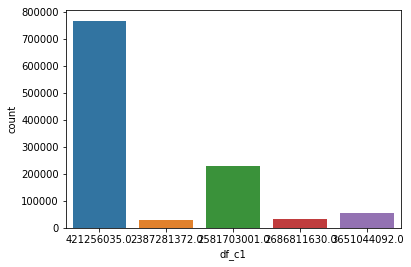

In [12]:
sns.countplot(train_data['df_c1'])

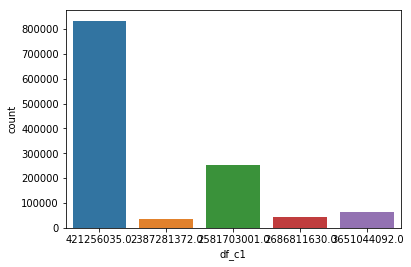

In [13]:
sns.countplot(test_data['df_c1'])

In [14]:
c1_dummy = pd.get_dummies(train_data['df_c1'])
c1_dummy = pd.DataFrame(c1_dummy)

In [15]:
c1_dummy.head()

,421256035.0,2387281372.0,2581703001.0,2686811630.0,3651044092.0
0,1,0,0,0,0
1,0,0,1,0,0
2,0,0,1,0,0
3,1,0,0,0,0
4,1,0,0,0,0


In [16]:
train_data=pd.concat([train_data,c1_dummy],axis=1)
    
train_data.head()

,id,click,I1,I2,C1,C2,C3,C4,C5,C6,...,I11,I12,I13,I14,df_c1,421256035.0,2387281372.0,2581703001.0,2686811630.0,3651044092.0
0,0,0,5,20,421256035,2377199148,2696211399,2298910535,3133252034,1509930964,...,NaN,NaN,NaN,780.0,4.212560e+08,1,0,0,0,0
1,1,0,5,20,2581703001,2589684548,1998340283,2411205997,3202148071,1238839469,...,NaN,NaN,NaN,0.0,2.581703e+09,0,0,1,0,0
2,2,0,5,20,2581703001,1862037199,2448089184,2411205997,1107442947,3668889797,...,NaN,NaN,NaN,117.0,2.581703e+09,0,0,1,0,0
3,3,0,5,20,421256035,3874378935,1658216424,2298910535,2321672976,1509930964,...,6.0,6.0,34501.0,390.0,4.212560e+08,1,0,0,0,0
4,4,1,5,20,421256035,3874378935,1892769125,2411205997,2321672976,1509930964,...,1.0,31.0,12557.0,390.0,4.212560e+08,1,0,0,0,0


In [17]:
train_data = train_data.drop(['C1','df_c1'],axis=1)

In [18]:
train_data.head()

,id,click,I1,I2,C2,C3,C4,C5,C6,I3,...,I10,I11,I12,I13,I14,421256035.0,2387281372.0,2581703001.0,2686811630.0,3651044092.0
0,0,0,5,20,2377199148,2696211399,2298910535,3133252034,1509930964,1,...,0,NaN,NaN,NaN,780.0,1,0,0,0,0
1,1,0,5,20,2589684548,1998340283,2411205997,3202148071,1238839469,0,...,0,NaN,NaN,NaN,0.0,0,0,1,0,0
2,2,0,5,20,1862037199,2448089184,2411205997,1107442947,3668889797,2,...,0,NaN,NaN,NaN,117.0,0,0,1,0,0
3,3,0,5,20,3874378935,1658216424,2298910535,2321672976,1509930964,1,...,0,6.0,6.0,34501.0,390.0,1,0,0,0,0
4,4,1,5,20,3874378935,1892769125,2411205997,2321672976,1509930964,1,...,0,1.0,31.0,12557.0,390.0,1,0,0,0,0


In [19]:
c1_dummy_test = pd.get_dummies(test_data['df_c1'])
c1_dummy_test = pd.DataFrame(c1_dummy_test)
test_data=pd.concat([test_data,c1_dummy_test],axis=1)
test_data = test_data.drop(['C1','df_c1'],axis=1)

test_data.head()

,id,I1,I2,C2,C3,C4,C5,C6,I3,I4,...,I10,I11,I12,I13,I14,421256035.0,2387281372.0,2581703001.0,2686811630.0,3651044092.0
0,1169042,5,20,3874378935,1892769125,2411205997,2321672976,1509930964,1,0,...,0,1.0,35.0,76335.0,390.0,1,0,0,0,0
1,1169043,5,20,1537671376,575044823,2298910535,1301721902,3111151614,2,0,...,0,69.0,1.0,5634916.0,91.0,1,0,0,0,0
2,1169044,5,20,1392597759,2522517098,2298910535,2321672976,1509930964,2,0,...,0,NaN,NaN,NaN,1300.0,1,0,0,0,0
3,1169045,5,20,1862037199,2448089184,2411205997,476085660,2068230268,1,1,...,1,NaN,NaN,NaN,52.0,0,0,1,0,0
4,1169046,5,20,3874378935,1892769125,2411205997,2321672976,1509930964,1,0,...,0,6.0,1.0,3921.0,390.0,1,0,0,0,0


In [20]:
train_data['C2'].value_counts().head(5)

3874378935    301238
1862037199    259814
2589684548    143799
1537671376    108640
1088910726     97224
Name: C2, dtype: int64

In [21]:
combine=[train_data,test_data]

#閾値を決めて頻度が少ない値をNaNに置き換える
for dataset in combine:
    dataset['df_c2'] = pd.DataFrame(dataset['C2'])
    threshold = 30000
    value_counts = dataset['df_c2'].value_counts()
    to_remove = value_counts[value_counts <=threshold].index
    dataset['df_c2'].replace(to_remove,np.nan,inplace=True)

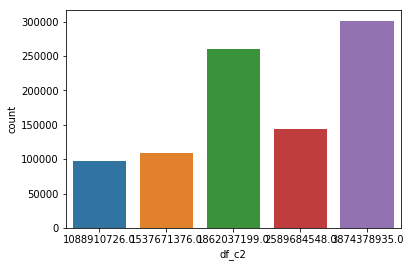

In [22]:
sns.countplot(train_data['df_c2'])

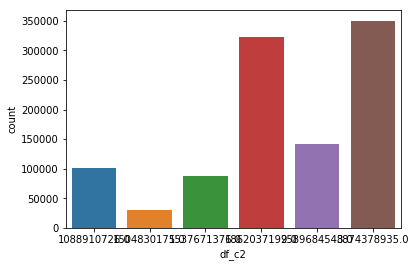

In [23]:
sns.countplot(test_data['df_c2'])

In [24]:
c2_dummy_test = pd.get_dummies(test_data['df_c2'])
c2_dummy_test = pd.DataFrame(c2_dummy_test)
test_data=pd.concat([test_data,c2_dummy_test],axis=1)
test_data = test_data.drop(['C2','df_c2'],axis=1)

test_data.head()

,id,I1,I2,C3,C4,C5,C6,I3,I4,I5,...,2387281372.0,2581703001.0,2686811630.0,3651044092.0,1088910726.0,1504830175.0,1537671376.0,1862037199.0,2589684548.0,3874378935.0
0,1169042,5,20,1892769125,2411205997,2321672976,1509930964,1,0,0,...,0,0,0,0,0,0,0,0,0,1
1,1169043,5,20,575044823,2298910535,1301721902,3111151614,2,0,0,...,0,0,0,0,0,0,1,0,0,0
2,1169044,5,20,2522517098,2298910535,2321672976,1509930964,2,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1169045,5,20,2448089184,2411205997,476085660,2068230268,1,1,0,...,0,1,0,0,0,0,0,1,0,0
4,1169046,5,20,1892769125,2411205997,2321672976,1509930964,1,0,0,...,0,0,0,0,0,0,0,0,0,1


In [25]:
train_data.head()

,id,click,I1,I2,C2,C3,C4,C5,C6,I3,...,I11,I12,I13,I14,421256035.0,2387281372.0,2581703001.0,2686811630.0,3651044092.0,df_c2
0,0,0,5,20,2377199148,2696211399,2298910535,3133252034,1509930964,1,...,NaN,NaN,NaN,780.0,1,0,0,0,0,NaN
1,1,0,5,20,2589684548,1998340283,2411205997,3202148071,1238839469,0,...,NaN,NaN,NaN,0.0,0,0,1,0,0,2.589685e+09
2,2,0,5,20,1862037199,2448089184,2411205997,1107442947,3668889797,2,...,NaN,NaN,NaN,117.0,0,0,1,0,0,1.862037e+09
3,3,0,5,20,3874378935,1658216424,2298910535,2321672976,1509930964,1,...,6.0,6.0,34501.0,390.0,1,0,0,0,0,3.874379e+09
4,4,1,5,20,3874378935,1892769125,2411205997,2321672976,1509930964,1,...,1.0,31.0,12557.0,390.0,1,0,0,0,0,3.874379e+09


In [26]:
c2_dummy_train = pd.get_dummies(train_data['df_c2'])
c2_dummy_train = pd.DataFrame(c2_dummy_train)
train_data=pd.concat([train_data,c2_dummy_train],axis=1)
train_data = train_data.drop(['C2','df_c2'],axis=1)

train_data.head()

,id,click,I1,I2,C3,C4,C5,C6,I3,I4,...,421256035.0,2387281372.0,2581703001.0,2686811630.0,3651044092.0,1088910726.0,1537671376.0,1862037199.0,2589684548.0,3874378935.0
0,0,0,5,20,2696211399,2298910535,3133252034,1509930964,1,0,...,1,0,0,0,0,0,0,0,0,0
1,1,0,5,20,1998340283,2411205997,3202148071,1238839469,0,2,...,0,0,1,0,0,0,0,0,1,0
2,2,0,5,20,2448089184,2411205997,1107442947,3668889797,2,1,...,0,0,1,0,0,0,0,1,0,0
3,3,0,5,20,1658216424,2298910535,2321672976,1509930964,1,0,...,1,0,0,0,0,0,0,0,0,1
4,4,1,5,20,1892769125,2411205997,2321672976,1509930964,1,0,...,1,0,0,0,0,0,0,0,0,1


C3～C5もまとめて処理したいが間違える確率高そうなのでひかえる

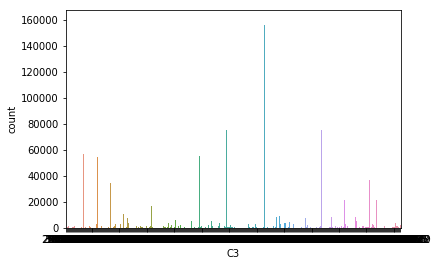

In [27]:
#C3についても同様に行う
sns.countplot(train_data['C3'])

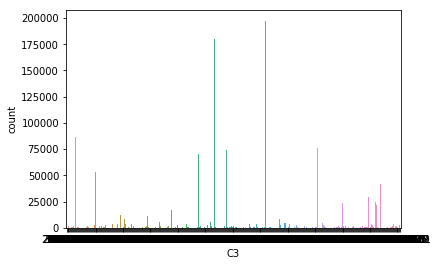

In [28]:
sns.countplot(test_data['C3'])

In [29]:
print(train_data['C3'].value_counts(sort=True).head(6))
print(test_data['C3'].value_counts(sort=True).head(6))

1892769125    159439
2448089184    156193
3260269773     75530
1998340283     75144
98956388       73953
189706718      57000
Name: C3, dtype: int64
2448089184    197430
1892769125    180326
98956388       86206
3260269773     76239
1998340283     73844
1658216424     69975
Name: C3, dtype: int64


In [30]:
combine=[train_data,test_data]

#閾値を決めて頻度が少ない値をNaNに置き換える
for dataset in combine:
    dataset['df_c3'] = pd.DataFrame(dataset['C3'])
    threshold = 70000
    value_counts = dataset['df_c3'].value_counts()
    to_remove = value_counts[value_counts <=threshold].index
    dataset['df_c3'].replace(to_remove,np.nan,inplace=True)

In [31]:
#C3のtrain_data

c3_dummy = pd.get_dummies(train_data['df_c3'])
c3_dummy = pd.DataFrame(c3_dummy)
train_data=pd.concat([train_data,c3_dummy],axis=1)
train_data = train_data.drop(['C3','df_c3'],axis=1)



In [32]:
#C3のtest_data

c3_dummy_test = pd.get_dummies(test_data['df_c3'])
c3_dummy_test = pd.DataFrame(c3_dummy_test)
test_data=pd.concat([test_data,c3_dummy_test],axis=1)
test_data = test_data.drop(['C3','df_c3'],axis=1)

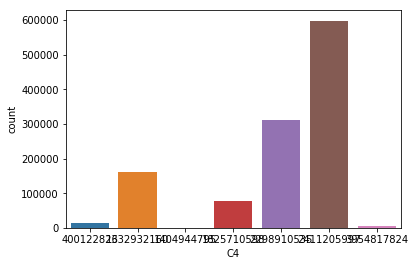

In [33]:
#C4についても同様に行う
sns.countplot(train_data['C4'])

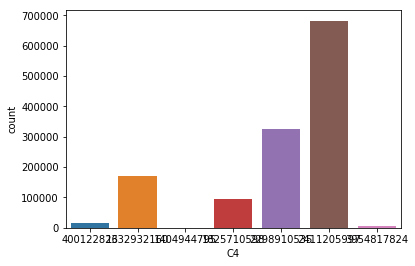

In [34]:
sns.countplot(test_data['C4'])

In [35]:
print(train_data['C4'].value_counts(sort=True).head(6))
print(test_data['C4'].value_counts(sort=True).head(6))

2411205997    598220
2298910535    311713
1332932160    162183
1825710598     78003
400122826      12993
3954817824      5785
Name: C4, dtype: int64
2411205997    681911
2298910535    326329
1332932160    170103
1825710598     94775
400122826      14725
3954817824      7104
Name: C4, dtype: int64


In [36]:
combine=[train_data,test_data]

#閾値を決めて頻度が少ない値をNaNに置き換える
for dataset in combine:
    dataset['df_c4'] = pd.DataFrame(dataset['C4'])
    threshold = 70000
    value_counts = dataset['df_c4'].value_counts()
    to_remove = value_counts[value_counts <=threshold].index
    dataset['df_c4'].replace(to_remove,np.nan,inplace=True)

In [37]:
#C4のtrain_data

c4_dummy = pd.get_dummies(train_data['df_c4'])
c4_dummy = pd.DataFrame(c4_dummy)
train_data=pd.concat([train_data,c4_dummy],axis=1)
train_data = train_data.drop(['C4','df_c4'],axis=1)

In [38]:
#C4のtest_data

c4_dummy_test = pd.get_dummies(test_data['df_c4'])
c4_dummy_test = pd.DataFrame(c4_dummy_test)
test_data=pd.concat([test_data,c4_dummy_test],axis=1)
test_data = test_data.drop(['C4','df_c4'],axis=1)

In [39]:
train_data.head()

,id,click,I1,I2,C5,C6,I3,I4,I5,I6,...,3874378935.0,98956388.0,1892769125.0,1998340283.0,2448089184.0,3260269773.0,1332932160.0,1825710598.0,2298910535.0,2411205997.0
0,0,0,5,20,3133252034,1509930964,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,1,0,5,20,3202148071,1238839469,0,2,1,1,...,0,0,0,1,0,0,0,0,0,1
2,2,0,5,20,1107442947,3668889797,2,1,0,0,...,0,0,0,0,1,0,0,0,0,1
3,3,0,5,20,2321672976,1509930964,1,0,0,0,...,1,0,0,0,0,0,0,0,1,0
4,4,1,5,20,2321672976,1509930964,1,0,0,0,...,1,0,1,0,0,0,0,0,0,1


In [40]:
test_data.head()

,id,I1,I2,C5,C6,I3,I4,I5,I6,I7,...,3874378935.0,98956388.0,1892769125.0,1998340283.0,2448089184.0,3260269773.0,1332932160.0,1825710598.0,2298910535.0,2411205997.0
0,1169042,5,20,2321672976,1509930964,1,0,0,0,0,...,1,0,1,0,0,0,0,0,0,1
1,1169043,5,20,1301721902,3111151614,2,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0
2,1169044,5,20,2321672976,1509930964,2,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
3,1169045,5,20,476085660,2068230268,1,1,0,0,0,...,0,0,0,0,1,0,0,0,0,1
4,1169046,5,20,2321672976,1509930964,1,0,0,0,0,...,1,0,1,0,0,0,0,0,0,1


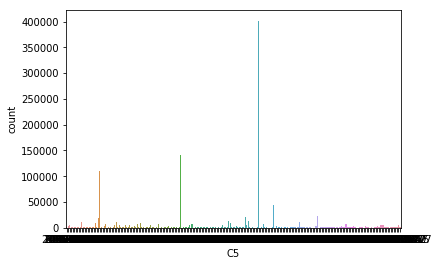

In [41]:
#C5についても同様に行う
sns.countplot(train_data['C5'])

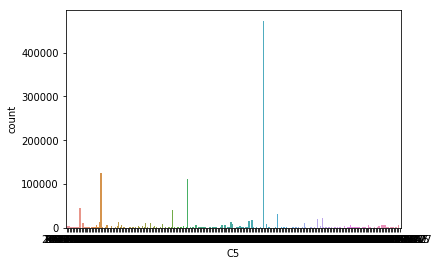

In [42]:
sns.countplot(test_data['C5'])

In [43]:
print (train_data['C5'].value_counts().head(6))
print (test_data['C5'].value_counts().head(6))

2321672976    401591
1410458339    140362
476085660     110843
2456844420     44425
3202148071     23032
2078330963     20930
Name: C5, dtype: int64
2321672976    472702
476085660     123957
1410458339    111344
181964554      45283
1309926075     41407
2456844420     32575
Name: C5, dtype: int64


In [44]:
combine=[train_data,test_data]

#閾値を決めて頻度が少ない値をNaNに置き換える
for dataset in combine:
    dataset['df_c5'] = pd.DataFrame(dataset['C5'])
    threshold = 110000
    value_counts = dataset['df_c5'].value_counts()
    to_remove = value_counts[value_counts <=threshold].index
    dataset['df_c5'].replace(to_remove,np.nan,inplace=True)

In [45]:
#C5のtrain_data

c5_dummy = pd.get_dummies(train_data['df_c5'])
c5_dummy = pd.DataFrame(c5_dummy)
train_data = pd.concat([train_data,c5_dummy],axis=1)
train_data = train_data.drop(['C5','df_c5'],axis=1)

#C5のtest_data

c5_dummy_test = pd.get_dummies(test_data['df_c5'])
c5_dummy_test = pd.DataFrame(c5_dummy_test)
test_data = pd.concat([test_data,c5_dummy_test],axis=1)
test_data = test_data.drop(['C5','df_c5'],axis=1)

In [46]:
train_data.head()

,id,click,I1,I2,C6,I3,I4,I5,I6,I7,...,1998340283.0,2448089184.0,3260269773.0,1332932160.0,1825710598.0,2298910535.0,2411205997.0,476085660.0,1410458339.0,2321672976.0
0,0,0,5,20,1509930964,1,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
1,1,0,5,20,1238839469,0,2,1,1,0,...,1,0,0,0,0,0,1,0,0,0
2,2,0,5,20,3668889797,2,1,0,0,0,...,0,1,0,0,0,0,1,0,0,0
3,3,0,5,20,1509930964,1,0,0,0,0,...,0,0,0,0,0,1,0,0,0,1
4,4,1,5,20,1509930964,1,0,0,0,0,...,0,0,0,0,0,0,1,0,0,1


In [47]:
test_data.head()

,id,I1,I2,C6,I3,I4,I5,I6,I7,I8,...,1998340283.0,2448089184.0,3260269773.0,1332932160.0,1825710598.0,2298910535.0,2411205997.0,476085660.0,1410458339.0,2321672976.0
0,1169042,5,20,1509930964,1,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,1
1,1169043,5,20,3111151614,2,0,0,1,0,0,...,0,0,0,0,0,1,0,0,0,0
2,1169044,5,20,1509930964,2,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,1
3,1169045,5,20,2068230268,1,1,0,0,0,0,...,0,1,0,0,0,0,1,1,0,0
4,1169046,5,20,1509930964,1,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,1


In [48]:
#C6についても同様に
print (train_data['C6'].value_counts().head(6))
print (test_data['C6'].value_counts().head(6))

1509930964    422105
3668889797    199356
2068230268    184139
3111151614    123799
1479325723     79423
147733495      39550
Name: C6, dtype: int64
1509930964    510855
3668889797    260254
2068230268    192493
3111151614    110606
1479325723     56414
147733495      40407
Name: C6, dtype: int64


In [49]:
combine=[train_data,test_data]

#閾値を決めて頻度が少ない値をNaNに置き換える
for dataset in combine:
    dataset['df_c6'] = pd.DataFrame(dataset['C6'])
    threshold = 110000
    value_counts = dataset['df_c6'].value_counts()
    to_remove = value_counts[value_counts <=threshold].index
    dataset['df_c6'].replace(to_remove,np.nan,inplace=True)

In [50]:
#C6のtrain_data

c6_dummy = pd.get_dummies(train_data['df_c6'])
c6_dummy = pd.DataFrame(c6_dummy)
train_data = pd.concat([train_data,c6_dummy],axis=1)
train_data = train_data.drop(['C6','df_c6'],axis=1)

#C6のtest_data

c6_dummy_test = pd.get_dummies(test_data['df_c6'])
c6_dummy_test = pd.DataFrame(c6_dummy_test)
test_data = pd.concat([test_data,c6_dummy_test],axis=1)
test_data = test_data.drop(['C6','df_c6'],axis=1)

In [51]:
train_data.head()

,id,click,I1,I2,I3,I4,I5,I6,I7,I8,...,1825710598.0,2298910535.0,2411205997.0,476085660.0,1410458339.0,2321672976.0,1509930964.0,2068230268.0,3111151614.0,3668889797.0
0,0,0,5,20,1,0,0,0,0,0,...,0,1,0,0,0,0,1,0,0,0
1,1,0,5,20,0,2,1,1,0,0,...,0,0,1,0,0,0,0,0,0,0
2,2,0,5,20,2,1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1
3,3,0,5,20,1,0,0,0,0,0,...,0,1,0,0,0,1,1,0,0,0
4,4,1,5,20,1,0,0,0,0,0,...,0,0,1,0,0,1,1,0,0,0


In [52]:
test_data.head()

,id,I1,I2,I3,I4,I5,I6,I7,I8,I9,...,1825710598.0,2298910535.0,2411205997.0,476085660.0,1410458339.0,2321672976.0,1509930964.0,2068230268.0,3111151614.0,3668889797.0
0,1169042,5,20,1,0,0,0,0,0,0,...,0,0,1,0,0,1,1,0,0,0
1,1169043,5,20,2,0,0,1,0,0,0,...,0,1,0,0,0,0,0,0,1,0
2,1169044,5,20,2,0,0,0,0,0,0,...,0,1,0,0,0,1,1,0,0,0
3,1169045,5,20,1,1,0,0,0,0,0,...,0,0,1,1,0,0,0,1,0,0
4,1169046,5,20,1,0,0,0,0,0,0,...,0,0,1,0,0,1,1,0,0,0


In [53]:
train_data.shape

(1169042, 42)

1    564628
2    452125
0    152289
Name: I3, dtype: int64


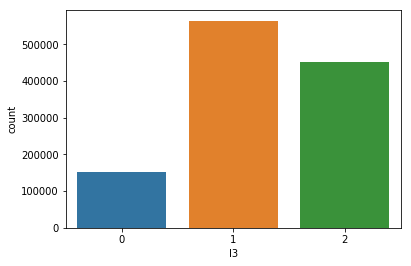

In [54]:
sns.countplot(train_data['I3'])
print(train_data['I3'].value_counts().head())

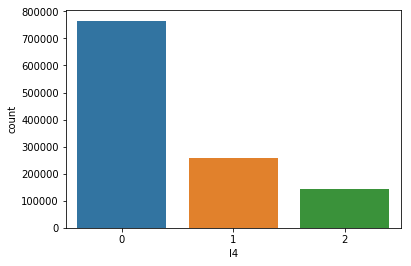

In [55]:
sns.countplot(train_data['I4'])

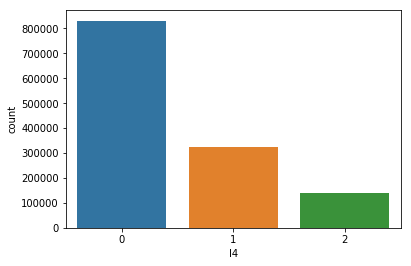

In [56]:
sns.countplot(test_data['I4'])

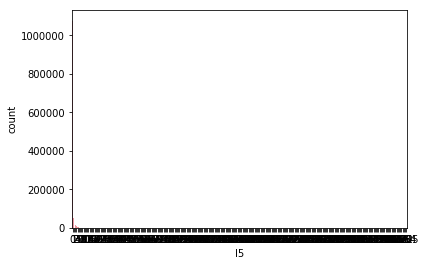

In [57]:
sns.countplot(train_data['I5'])

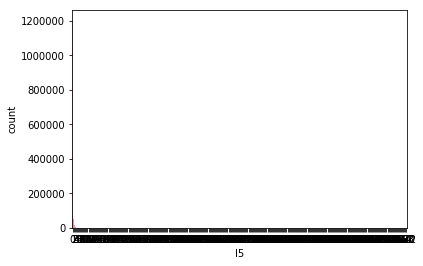

In [58]:
sns.countplot(test_data['I5'])

trainとtestのdata['I5']はデータとして特徴がない??

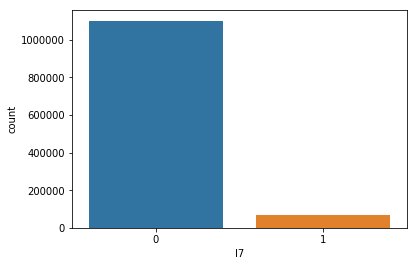

In [59]:
sns.countplot(train_data['I7'])

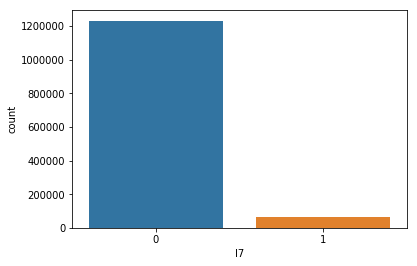

In [60]:
sns.countplot(test_data['I7'])

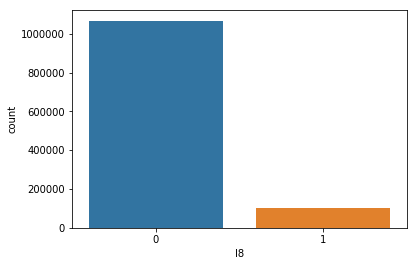

In [61]:
sns.countplot(train_data['I8'])

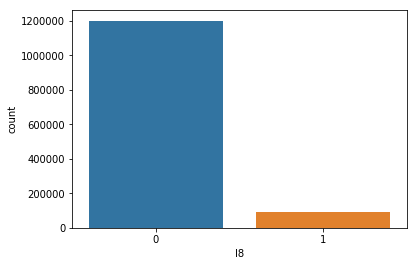

In [67]:
sns.countplot(test_data['I8'])

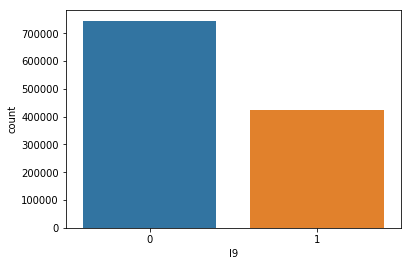

In [68]:
sns.countplot(train_data['I9'])

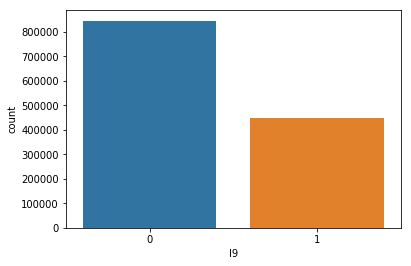

In [69]:
sns.countplot(test_data['I9'])

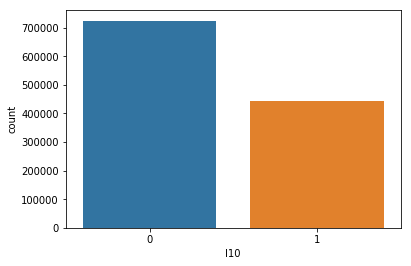

In [70]:
sns.countplot(train_data['I10'])

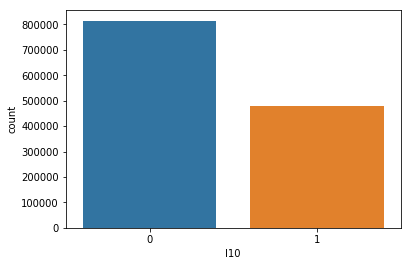

In [71]:
sns.countplot(test_data['I10'])

In [72]:
#I3～I10　まではクラス分けされていると考えて良さそう

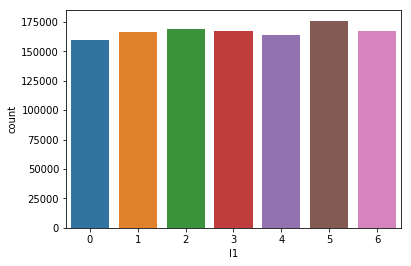

In [73]:
sns.countplot(train_data['I1'])

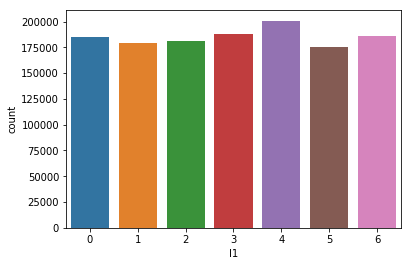

In [74]:
sns.countplot(test_data['I1'])

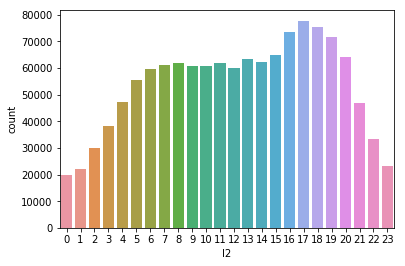

In [75]:
sns.countplot(test_data['I2'])

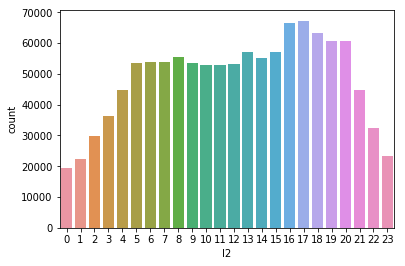

In [76]:
sns.countplot(train_data['I2'])

In [77]:
train_data.isnull().sum()

id                   0
click                0
I1                   0
I2                   0
I3                   0
I4                   0
I5                   0
I6                   0
I7                   0
I8                   0
I9                   0
I10                  0
I11             187288
I12             187288
I13             187288
I14              39620
421256035.0          0
2387281372.0         0
2581703001.0         0
2686811630.0         0
3651044092.0         0
1088910726.0         0
1537671376.0         0
1862037199.0         0
2589684548.0         0
3874378935.0         0
98956388.0           0
1892769125.0         0
1998340283.0         0
2448089184.0         0
3260269773.0         0
1332932160.0         0
1825710598.0         0
2298910535.0         0
2411205997.0         0
476085660.0          0
1410458339.0         0
2321672976.0         0
1509930964.0         0
2068230268.0         0
3111151614.0         0
3668889797.0         0
dtype: int64

In [78]:
test_data.isnull().sum()

id                   0
I1                   0
I2                   0
I3                   0
I4                   0
I5                   0
I6                   0
I7                   0
I8                   0
I9                   0
I10                  0
I11             229707
I12             229707
I13             229707
I14              41435
421256035.0          0
2387281372.0         0
2581703001.0         0
2686811630.0         0
3651044092.0         0
1088910726.0         0
1504830175.0         0
1537671376.0         0
1862037199.0         0
2589684548.0         0
3874378935.0         0
98956388.0           0
1892769125.0         0
1998340283.0         0
2448089184.0         0
3260269773.0         0
1332932160.0         0
1825710598.0         0
2298910535.0         0
2411205997.0         0
476085660.0          0
1410458339.0         0
2321672976.0         0
1509930964.0         0
2068230268.0         0
3111151614.0         0
3668889797.0         0
dtype: int64

In [79]:
#欠損値をどう埋めるか？？

In [81]:
#やりたくないけど0で埋める
train_fillna = train_data.dropna()

In [82]:
test_fillna = test_data.dropna(0)

In [83]:
X_train = train_fillna.drop(['id','click'],axis=1)
y_train = train_fillna['click']
X_test = test_fillna.drop(['id'],axis=1)

X_train.shape, y_train.shape, X_test.shape

((950557, 40), (950557,), (1034721, 41))

In [84]:
X_train.columns

Index([        'I1',         'I2',         'I3',         'I4',         'I5',
               'I6',         'I7',         'I8',         'I9',        'I10',
              'I11',        'I12',        'I13',        'I14',  421256035.0,
       2387281372.0, 2581703001.0, 2686811630.0, 3651044092.0, 1088910726.0,
       1537671376.0, 1862037199.0, 2589684548.0, 3874378935.0,   98956388.0,
       1892769125.0, 1998340283.0, 2448089184.0, 3260269773.0, 1332932160.0,
       1825710598.0, 2298910535.0, 2411205997.0,  476085660.0, 1410458339.0,
       2321672976.0, 1509930964.0, 2068230268.0, 3111151614.0, 3668889797.0],
      dtype='object')

In [85]:
X_test.columns[20]

1504830175.0

In [86]:
X_test_ = X_test.drop(X_test.columns[20],axis=1)

In [87]:
X_train.shape, y_train.shape, X_test_.shape

((950557, 40), (950557,), (1034721, 40))

In [ ]:
# Support Vector Machines

svc = SVC()
svc.fit(X_train, y_train)

C:\Users\mkou0\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


In [ ]:
Y_pred = svc.predict(X_test_)
acc_svc = round(svc.score(X_train, y_train) * 100, 2)
acc_svc